<h2 style="text-align: center;">Statistics & Linear Model Lab5</h2>
<h3 style="text-align: center;">Wenjie Hu</h3>
<h3 style="text-align: center;">12/1/2024</h3>

In [4]:
library(orthopolynom)
library(ggplot2)
library(tidyr)

![](./imgs/1706352005407.jpg)

### EX1.

In [5]:
neyman_s <- function(K, x) {
  n <- length(x)
  selection_values <- numeric(K)
  
  for (k in 1:K) {
    bkx <- legendre.polynomials(n = k, normalized = TRUE)
    poly_val <- as.matrix(as.data.frame(polynomial.values(polynomials = bkx, x = scaleX(x, u = -1, v = 1))))
    poly_val <- poly_val[, 2:ncol(poly_val)]
    poly_val <- t(poly_val)
    
    Nk <- (1/sqrt(n)) * sum(poly_val[, 1:n])^2
    log_n <- log(n)
      
    if (k == 1) {
      selection_values[k] <- k
    } else {
      for (j in 1:K) {
        Nj <- (1/sqrt(n)) * sum(poly_val[j, 1:n])^2
        if (Nk - k * log_n >= Nj - j * log_n) {
          selection_values[k] <- k
        }
      }
    }
      selected_k <- which.max(selection_values)
      ans <- sum((1/sqrt(n)) * sum(poly_val[selected_k, 1:n])^2)
  }
  return(ans)
}


In [6]:
n=10
nss <- c()
for (i in 1:10000){
    X = runif(n, 0, 1)
    ns <- neyman_s(1, X)
    nss[i] <- ns
}

In [7]:
ns_cr <- quantile(nss, 0.95)
ns_cr

95% 
4.8521

In [8]:
ns_true_cr <- qchisq(0.95, df = 1)
ns_true_cr

[1] 3.841459

In [9]:
neyman_t <- function(K, x, pc) {
  n <- length(x)
  selection_values <- numeric(K)
  
  for (k in 1:K) {
    bkx <- legendre.polynomials(n = k, normalized = TRUE)
    poly_val <- as.matrix(as.data.frame(polynomial.values(polynomials = bkx, x = scaleX(x, u = -1, v = 1))))
    poly_val <- poly_val[, 2:ncol(poly_val)]
    poly_val <- t(poly_val)
    
    max_term <- max(abs((1/sqrt(n)) * sum(poly_val[, 1:n]) * pc * log(n)))
    
    if (max_term <= pc * log(n)) {
      prod_k_n <- k * log(n)
    } else {
      prod_k_n <- k * log(n) + 2 * k * max_term
    }
    
    Nk <- (1/sqrt(n)) * sum(poly_val[, 1:n])^2
    condition <- Nk - prod_k_n
    
    if (k == 1) {
      selection_values[k] <- condition
    } else {
      for (j in 1:(k - 1)) {
        Nj <- (1/sqrt(n)) * sum(poly_val[j, 1:n])^2
        prod_j_n <- j * log(n)
        if (condition >= Nj - prod_j_n) {
          selection_values[k] <- condition
        }
      }
    }
  }
  
  selected_k <- which.min(selection_values)
  for (j in 1:selected_k) {
    ans <- sum((1/sqrt(n)) * sum(poly_val[j, 1:n])^2)
  }
  return(ans)
}


In [228]:
n=10
nts <- c()
K = 12
pc = 2.4
for (i in 1:10000){
    X = runif(n, 0, 1)
    nt <- neyman_t(K, X, pc)
    nts[i] <- nt
}

In [229]:
nt_cr <- quantile(nts, 0.95)
nt_cr

95% 
5.707506

In [10]:
nt_true_cr <- qchisq(0.95, df = 1)
nt_true_cr

[1] 3.841459

In [11]:
K <- 12
pc <-2.4
nsss <- ns_crs_1 <- nt_crs_1 <- numeric()
for (n in seq(10, 100, 10)) {
 nss <- nts <- numeric()
  
  for (i in 1:10000) {
    X <- runif(n,0,1)
    ns <- neyman_s(1, X)
    nt <- neyman_t(K, X, pc)
  
    nss[i] <- ns
    nts[i] <- nt
  }
  
  ns_cr <- quantile(nss, 0.95)
  nt_cr <- quantile(nts, 0.95)
  
  nsss <- c(nsss, n)
  ns_crs_1 <- c(ns_crs_1, ns_cr)
  nt_crs_1 <- c(nt_crs_1, nt_cr)
}


In [13]:
df_crs <- data.frame(
  "n" = nsss,
  "N_S" = round(ns_crs_1, 3),
  "N_T" = round(nt_crs_1, 3)
)
print(df_crs)

     n    N_S    N_T
1   10  4.649  5.777
2   20  7.552  8.873
3   30  9.648 11.552
4   40 11.255 13.456
5   50 13.014 14.888
6   60 14.477 16.353
7   70 15.601 17.870
8   80 16.637 19.177
9   90 18.180 20.846
10 100 18.567 21.311


In [ ]:
df_cr_t <- data.frame(
  "n" = nsss,
  "N_S" = round(ns_crs_1 - ns_true_cr, 3),
  "N_T" = round(nt_crs_1 - nt_true_cr, 3)
)
print(df_cr_t)

For the first numerical experitment, we were asked repeat the experiment from List 3 which is calculate the value of the statistic Neyman's smooth test with 1 component but based on two data-driven selection rules $S=min\{k:1\leq k \leq K, N_k-k\log n \geq N_j - j\log n, j \in \{1,...,K \}\}$ and $T=min\{k:1\leq k\leq K, N_k-\prod(k,n)\geq N_j-\prod(j,n),j\in \{1,...,K\}\}$, and the significance level $\alpha=0.05$, we try to find the critical values of the tests, compare them with the 0.95-quantiles of respective limiting dristribution, and repeat the experiment for $n=20,30...,100$. The critical value results we present blow. As we can see, when $ n $ increases, the critical value also increases.
|  $n$| $N_s$    |  $N_t$      | 
|----|-------| ----------|
|10|4.649|5.777|
|20|7.552|8.873|
|30|9.648|11.552|
|40|11.255|13.456|
|50|13.014|14.888|
|60|14.477|16.353|
|70|15.601|17.870|
|80|16.637|19.177|
|90|18.180|20.846|
|100|18.567|21.311|

### EX3.

In [15]:
get_density <- function(p, j) {
  f <- function(u) {
    return(1 + p * cos(j * pi * u))
  }
  return(f)
}

get_sample <- function(n, f, p = 0.4, j) {
  scaling_factor <- 1 + p
  sample <- numeric(0)
  
  while (length(sample) < n) {
    u <- runif(1, 0, 1)
    v <- runif(1, 0, scaling_factor)
    if (v < f(u)) {
      sample <- c(sample, u)
    }
  }
  return(sample)
}

In [17]:
p <- 0.4
j <- 1
K <- 12
pc <-2.4
f <- get_density(p,j)
nns <- ns_ps <- nt_ps <- numeric()
for (n in seq(10, 100, by = 10)) {
  nss <- nts <- c()
  for (i in seq(10000)) {
    X <- get_sample(n, f, p, j)
    ns <- neyman_s(1, X)
    nt <- neyman_t(K, X, pc)

    nss <- c(nss, ns)
    nts <- c(nts, nt)
  }
  nns <- c(nns, n)
  ns_ps<- c(ns_ps, sum(nss > ns_true_cr) / 10000)
  nt_ps <- c(nt_ps, sum(nts > nt_true_cr) / 10000)
}


In [18]:
df_ps <- data.frame(
  "n" = nns,
  "N_S" = round(ns_ps , 4),
  "N_T" = round(nt_ps , 4)
)
print(df_ps)

     n    N_S    N_T
1   10 0.1360 0.1790
2   20 0.3970 0.3963
3   30 0.5802 0.5156
4   40 0.7064 0.5838
5   50 0.8061 0.6483
6   60 0.8623 0.6768
7   70 0.9099 0.6981
8   80 0.9386 0.7070
9   90 0.9624 0.6922
10 100 0.9751 0.6808


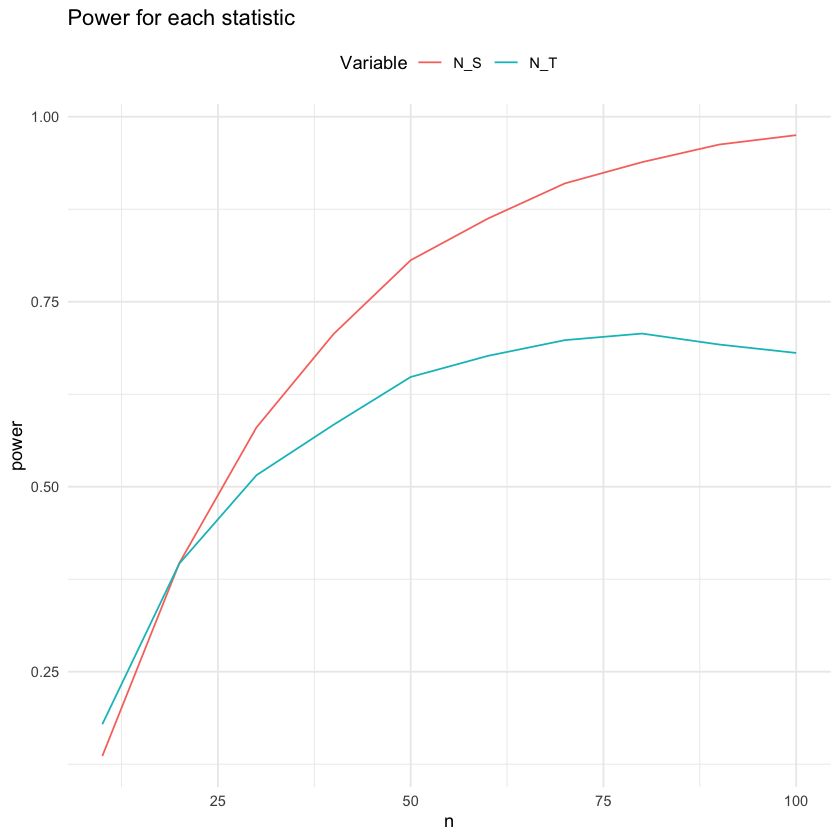

In [52]:
df_ps_g <- gather(df_ps, key = "Variable", value = "Value", -n)
plot_size <- c(8, 2)
p <- ggplot(df_ps_g, aes(x = n, y = Value, color = Variable)) +
  geom_line() +
  labs(title = "Power for each statistic",
       x = "n",
       y = "power") +
  theme_minimal() +
  theme(legend.position = "top")
print(p)

In the second task we generated observations from the density $C_j(u,0.4)=1+0.4\cos(j\pi u),u\in(0,1)$, then we calculated the values of the statistics $N_s, N_t$ where $s,t$ are selection rules, And we repeated the experiment for 10000 times for $n=10,20,...,100$ to find the values of powers functions, the results presented above. We can observe that as the size of $n$ increases, while the difference is that $N_s$ is growing continuously, $N_t$ starts to recede when the sample $n$ size reaches about 70.

### EX4.

In [20]:
params <- list(
  c(2, 0.5),
  c(3, 0.5),
  c(4, 0.6),
  c(5, 0.7),
  c(6, 0.7)
)

     n   N_S   N_T
1   10 0.140 0.198
2   20 0.233 0.298
3   30 0.259 0.279
4   40 0.323 0.328
5   50 0.329 0.322
6   60 0.384 0.385
7   70 0.387 0.379
8   80 0.433 0.439
9   90 0.447 0.439
10 100 0.429 0.442
     n   N_S   N_T
1   10 0.138 0.191
2   20 0.240 0.289
3   30 0.294 0.319
4   40 0.375 0.384
5   50 0.332 0.335
6   60 0.382 0.375
7   70 0.433 0.437
8   80 0.404 0.404
9   90 0.403 0.407
10 100 0.426 0.440


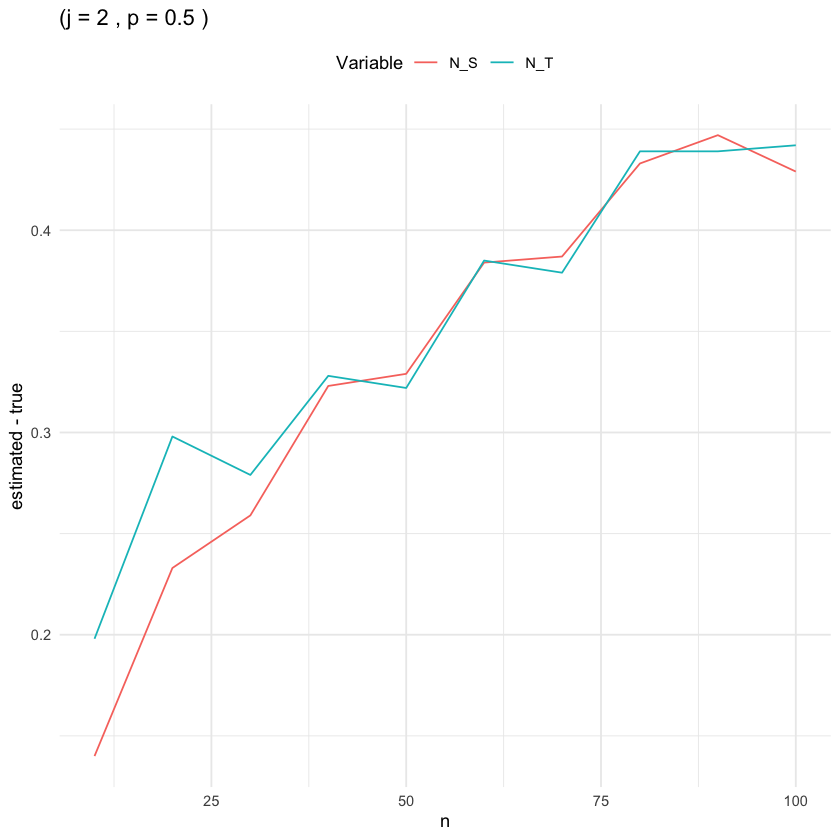

     n   N_S   N_T
1   10 0.128 0.180
2   20 0.249 0.293
3   30 0.305 0.324
4   40 0.315 0.318
5   50 0.315 0.328
6   60 0.365 0.369
7   70 0.377 0.389
8   80 0.418 0.418
9   90 0.438 0.447
10 100 0.423 0.414


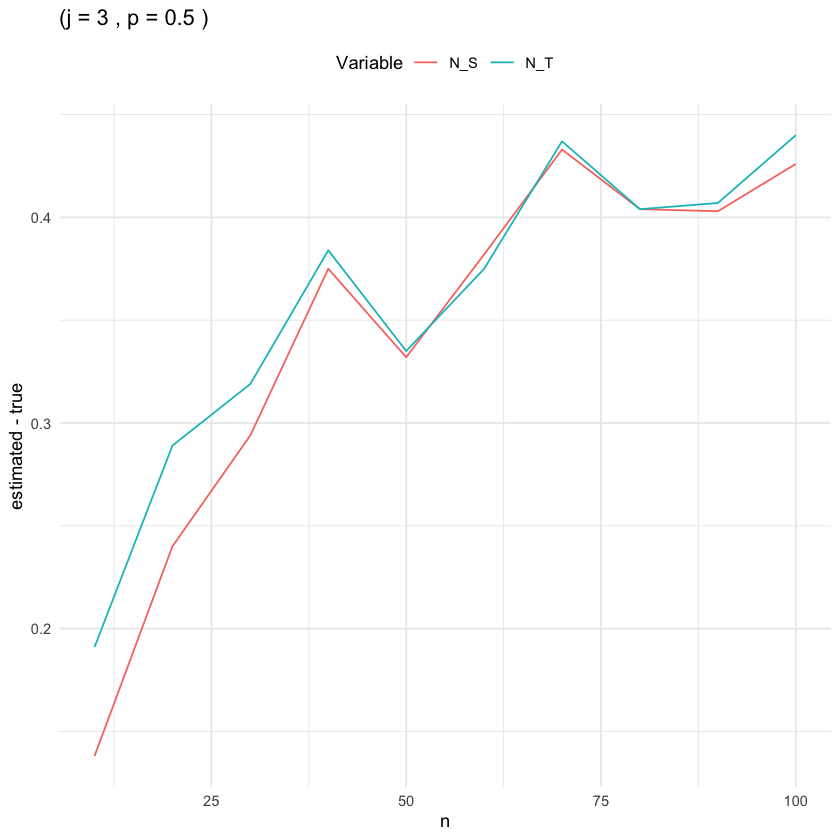

     n   N_S   N_T
1   10 0.159 0.212
2   20 0.246 0.298
3   30 0.274 0.298
4   40 0.311 0.310
5   50 0.358 0.357
6   60 0.348 0.354
7   70 0.393 0.377
8   80 0.410 0.418
9   90 0.426 0.425
10 100 0.452 0.446


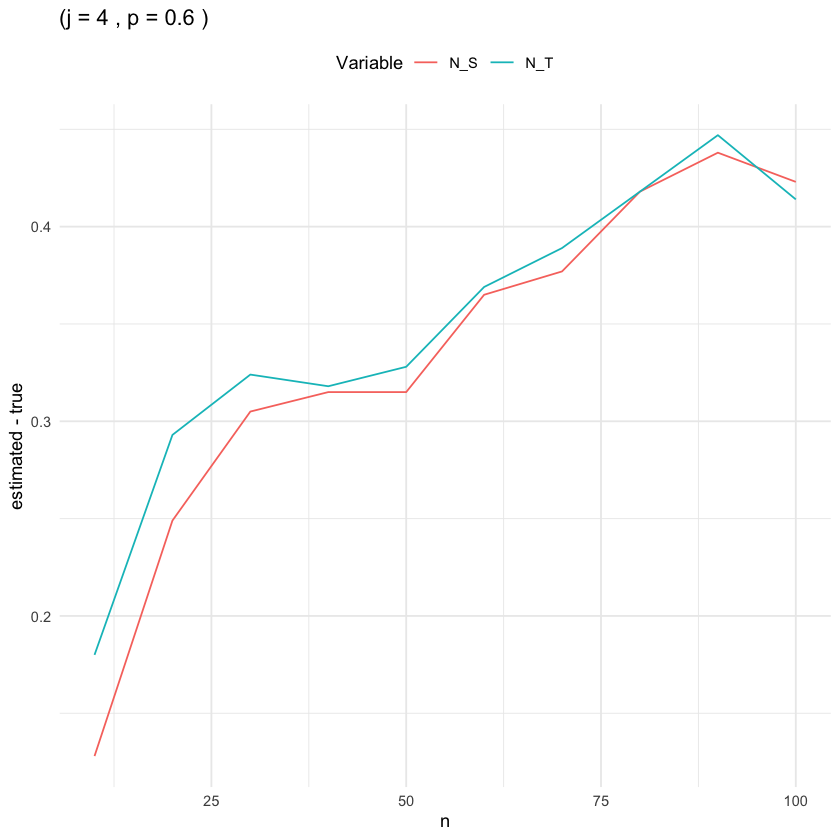

     n   N_S   N_T
1   10 0.148 0.219
2   20 0.236 0.281
3   30 0.270 0.287
4   40 0.328 0.344
5   50 0.381 0.382
6   60 0.383 0.385
7   70 0.407 0.406
8   80 0.454 0.451
9   90 0.443 0.425
10 100 0.417 0.405


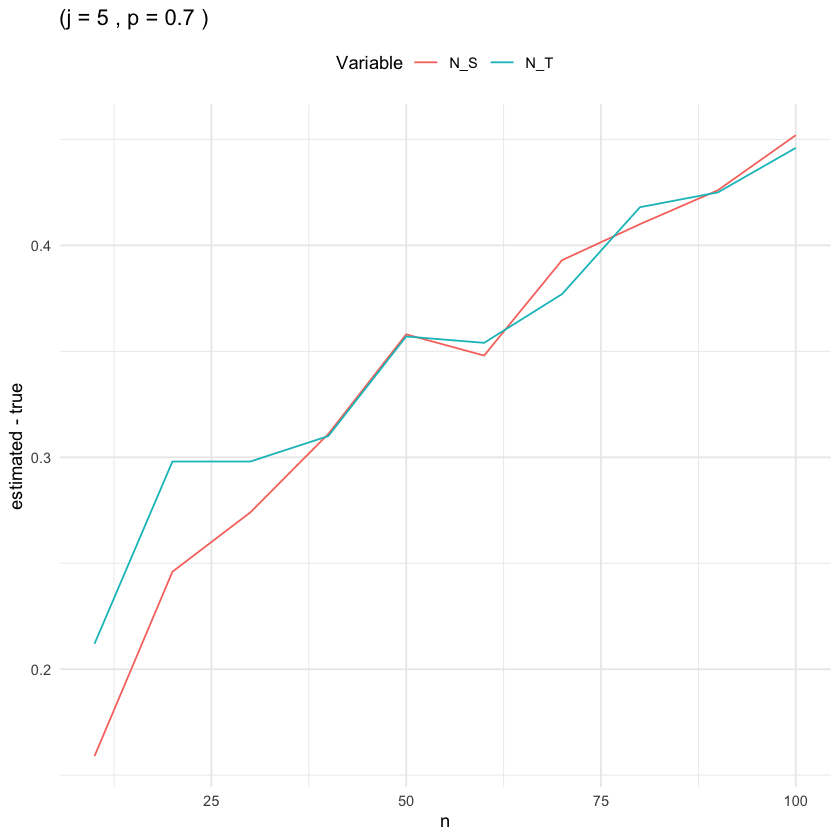

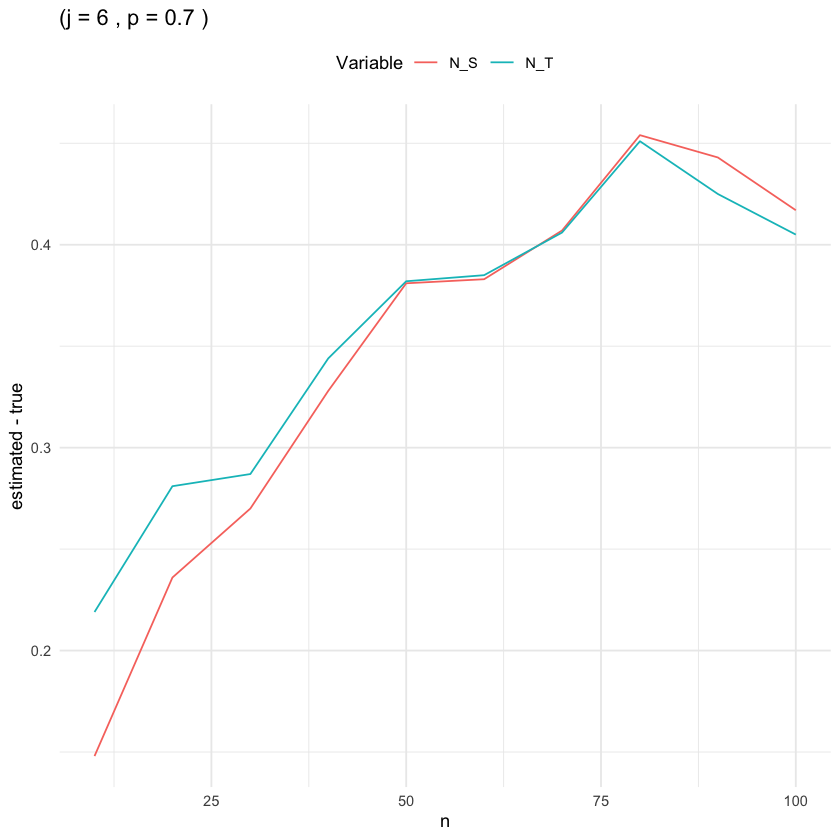

In [51]:
p <- 0.4
j <- 1
K <- 12
f <- get_density(p,j)
pc <-2.4

for (param in params) {
  j <- param[1]
  p <- param[2]
  nssss <- ns_ps_p <- nt_ps_p <- c()
  for (n in seq(10, 100, by = 10)) {
    nss <- nts <- c()
    for (i in 1:1000) {
      X <- get_sample(n, f, p, j)
      ns <- neyman_s(1, X)
      nt <- neyman_t(K, X, pc)
  
      nss <- c(nss, ns)
      nts <- c(nts, nt)
    }
    
    nssss <- c(nssss, n)
    ns_ps_p <- c(ns_ps_p, sum(nss > ns_true_cr) / 1000)
    nt_ps_p <- c(nt_ps_p, sum(nts > nt_true_cr) / 1000)
  }

  df_powers_p <- data.frame(
    "n" = nssss,
    "N_S" = round(ns_ps_p, 3),
    "N_T" = round(nt_ps_p, 3)
  )  
  print(df_powers_p)

  
  df_powers_g <- gather(df_powers_p, key = "Variable", value = "Value",-n)
  plot_size <- c(8, 2)
  p <- ggplot(df_powers_g, aes(x = n, y = Value, color = Variable)) +
  geom_line() +
  labs(title = paste("(j =", j, ", p =", p, ")"),
       x = "n",
       y = "estimated - true") +
  theme_minimal() +
  theme(legend.position = "top")

  print(p)
}


For the last task, we generated $n=10,20,...,100$ from the density $C_1(u,p)=1+p\cos(j\pi u),u\in(0,1)$ with different parameters where $j=2, 3, 4, 5, 6$  $p=0.5, 0.5, 0.6, 0.7, 0.7$ and then repeat the same experiments from the previous task. From the graph above we can observe that overall the power of the statistic is increasing with the sample size $n$, but it becomes very unstable. And the power of $N_s$ and $N_t$ are very close to each other.